In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, precision_recall_curve, average_precision_score
)
from tensorflow.keras import layers
import random
from PIL import Image
import pandas as pd
%matplotlib inline

# Load Image Data

In [2]:
train_image="/kaggle/input/cards-image-datasetclassification/train/"
valid_image="/kaggle/input/cards-image-datasetclassification/valid/"
test_image="/kaggle/input/cards-image-datasetclassification/test/"

# Compare Each Length from Train Dataset

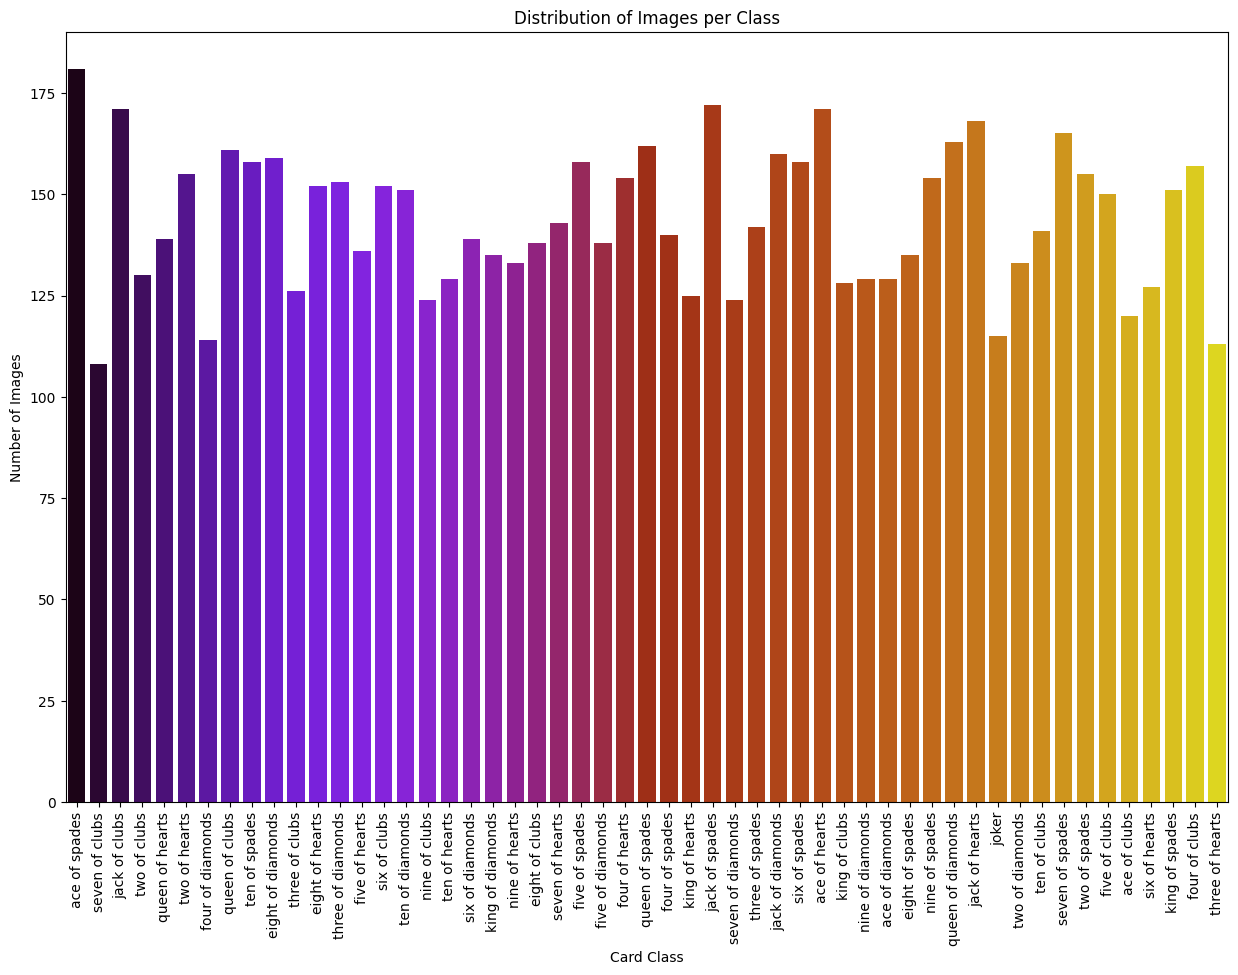

In [3]:
class_counts={cls : len(os.listdir(os.path.join(train_image,cls))) for cls in os.listdir(train_image)}
df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="Class", y="Image Count", palette="gnuplot")
plt.xticks(rotation=90)
plt.xlabel("Card Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.show()

# Compare Validation Class Length

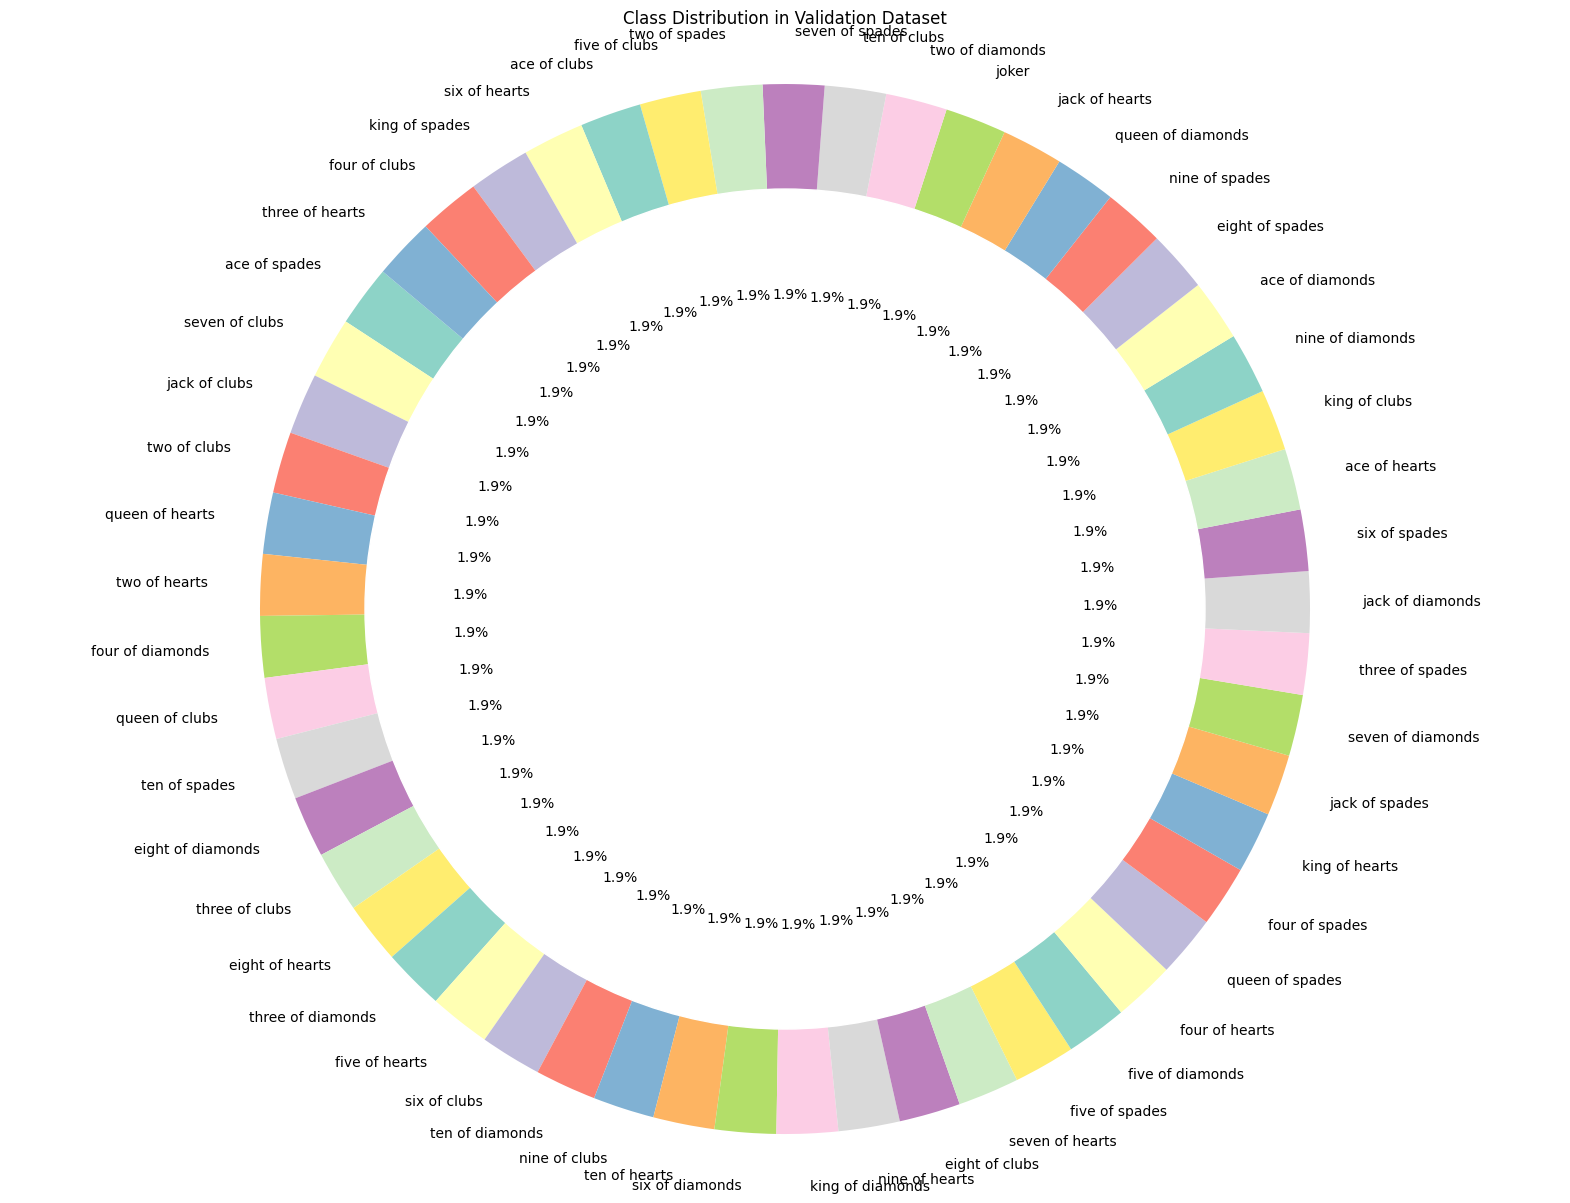

In [4]:
class_counts = {cls: len(os.listdir(os.path.join(valid_image, cls))) for cls in os.listdir(valid_image)}

# Extract class names and counts
labels = list(class_counts.keys())
sizes = list(class_counts.values())

# Plot a donut chart (pie chart with a white center)
plt.figure(figsize=(20, 15))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors[:len(labels)])
plt.gca().add_artist(plt.Circle((0, 0), 0.8, color='white'))  # Create a white center
plt.axis("equal")
plt.title("Class Distribution in Validation Dataset")
plt.show()

# Compare Each Class Length from test data

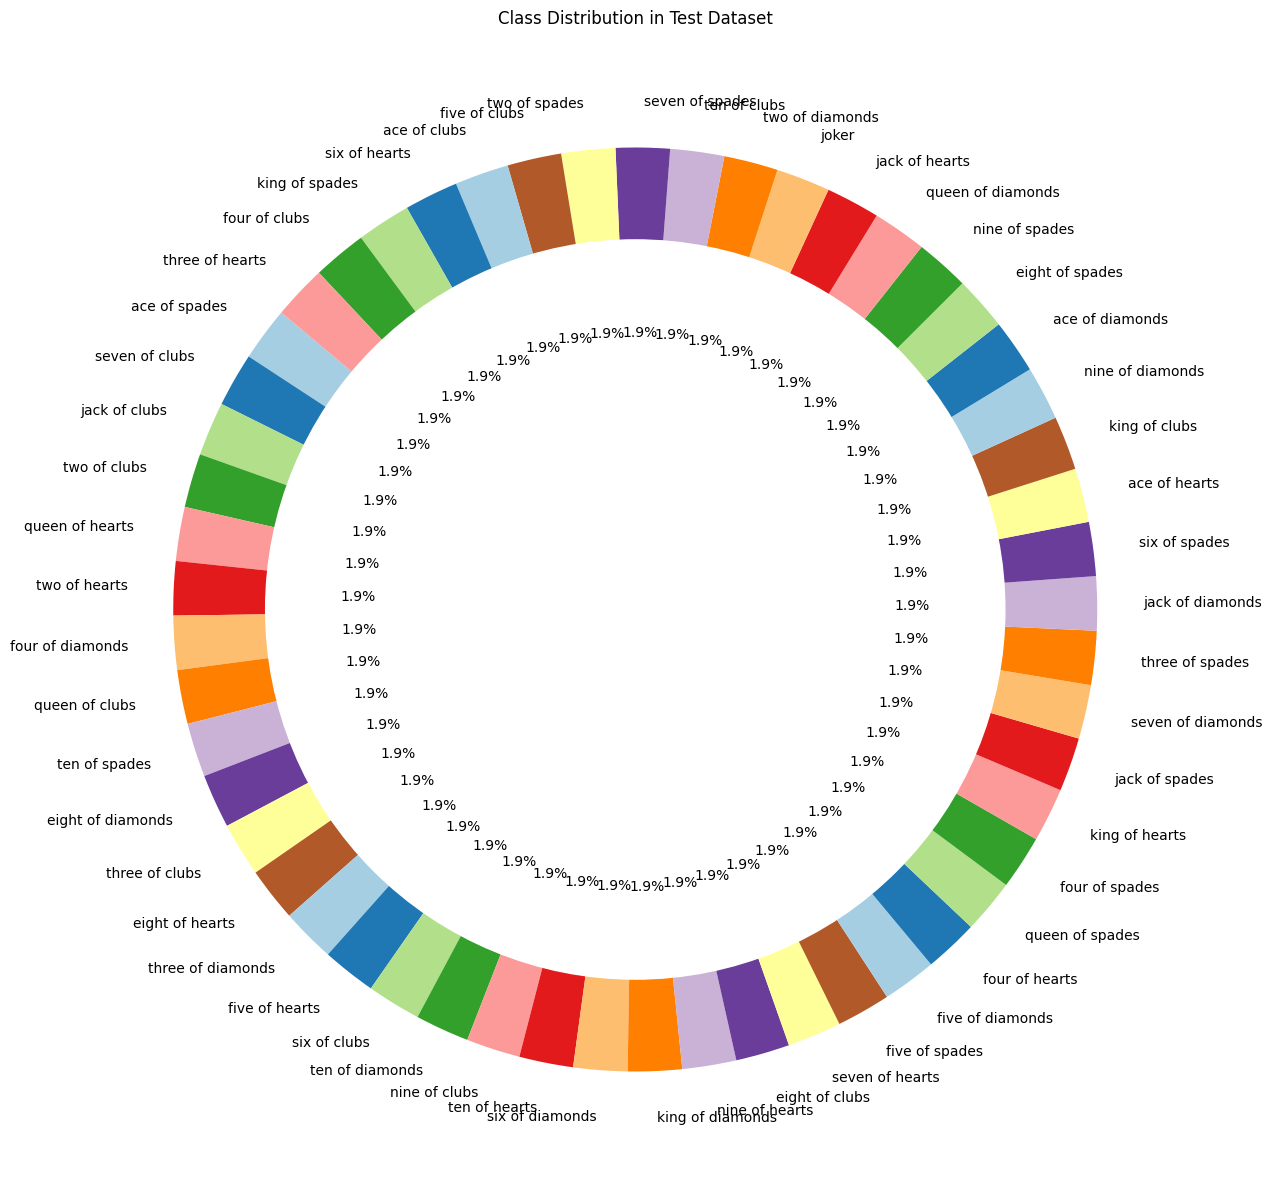

In [5]:

class_counts = {cls: len(os.listdir(os.path.join(test_image, cls))) for cls in os.listdir(test_image)}

# Extract class names and counts
labels = list(class_counts.keys())
sizes = list(class_counts.values())

# Plot a donut chart (pie chart with a white center)
plt.figure(figsize=(20, 15))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors[:len(labels)])
plt.gca().add_artist(plt.Circle((0, 0), 0.8, color='white'))  # Create a white center

plt.title("Class Distribution in Test Dataset")
plt.show()

# visualize some images from train data

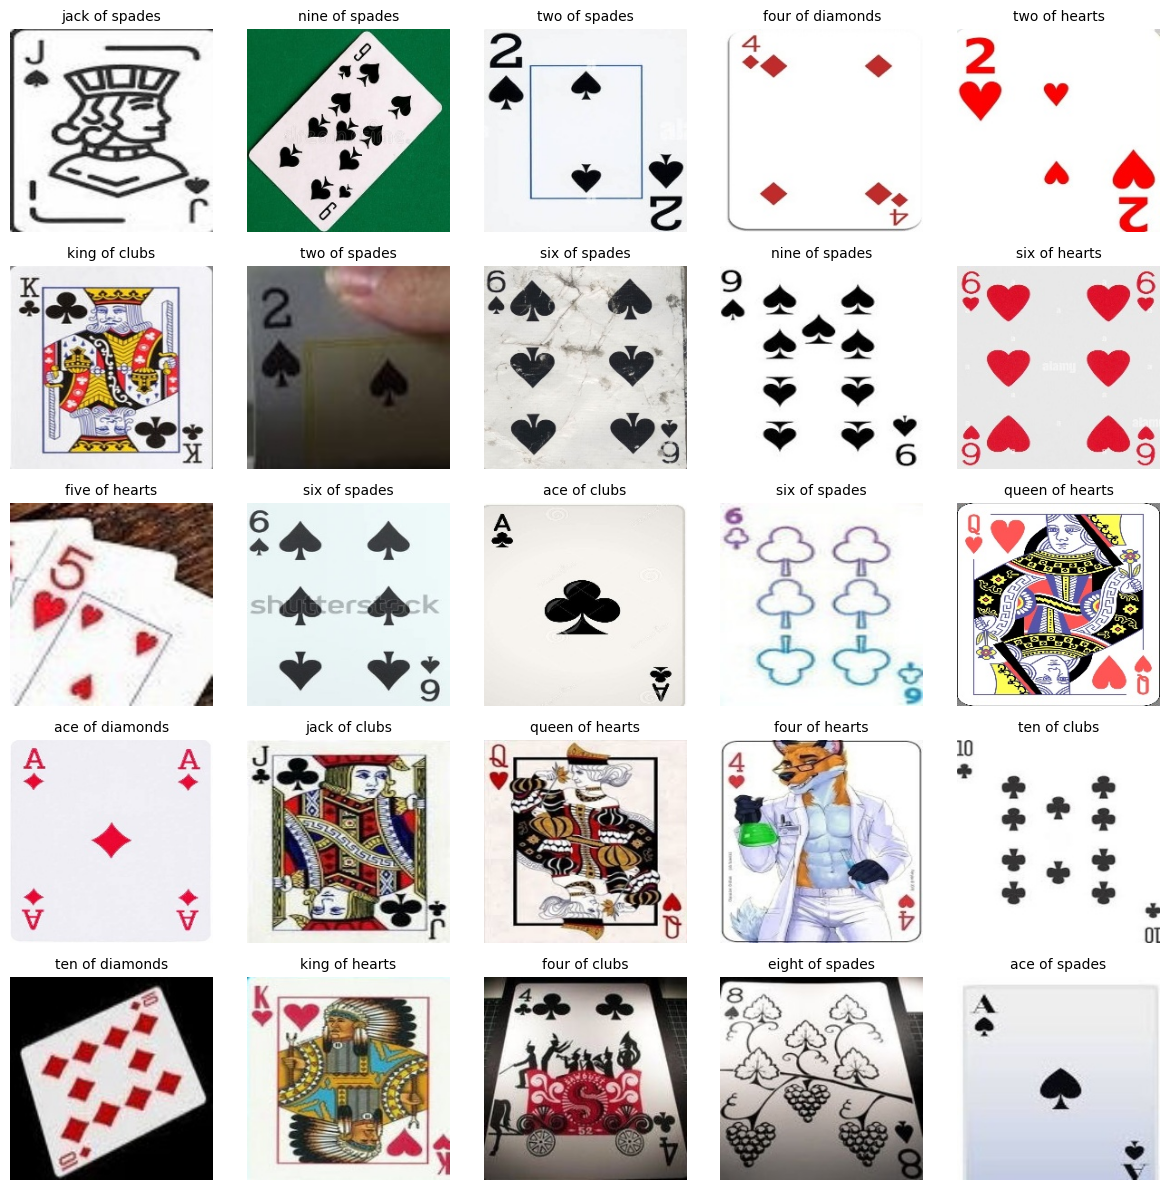

In [6]:
# Get all class names (folder names)
class_names = os.listdir(train_image)

# Collect all image paths
image_paths = []
image_labels = []

for class_name in class_names:
    class_folder = os.path.join(train_image, class_name)
    images = os.listdir(class_folder)
    
    for img in images:
        image_paths.append(os.path.join(class_folder, img))
        image_labels.append(class_name)

# Select 25 random images
random_indices = random.sample(range(len(image_paths)), 25)
selected_images = [image_paths[i] for i in random_indices]
selected_labels = [image_labels[i] for i in random_indices]

# Plot the images in a 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    img = Image.open(selected_images[i])  # Open image
    ax.imshow(img)
    ax.set_title(selected_labels[i], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Create Tf keras dataset

In [7]:
batch_size=32
image_size=(150,150)

train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_image,image_size=image_size,batch_size=batch_size,
                                                            label_mode="categorical",shuffle=True)

valid_ds=tf.keras.preprocessing.image_dataset_from_directory(valid_image,image_size=image_size,batch_size=batch_size,
                                                            label_mode="categorical",shuffle=False)


test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_image,image_size=image_size,batch_size=batch_size,
                                                            label_mode="categorical",shuffle=False)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [8]:
for images, labels in train_ds.take(1):
    print(f"Labels: {labels.numpy()}")

Labels: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
class_names=train_ds.class_names
print(f"Class Names : {class_names}")

Class Names : ['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [10]:
# Get class names directly from the dataset
class_names = train_ds.class_names

# Check the first batch of data in train_ds
for images, labels in train_ds.take(1):
    # Get the class indices for the one-hot encoded labels
    predicted_class_indices = tf.argmax(labels, axis=1).numpy()  # Find the class index by getting the max value in each label
    
    # Map the class indices to class names
    predicted_class_names = [class_names[idx] for idx in predicted_class_indices]
    
    print(f"Predicted class indices: {predicted_class_indices}")
    print(f"Predicted class names: {predicted_class_names}")


Predicted class indices: [36 29 27 12 21 12 42 38  8 33 22  2 50 35 14  4 48 15 16  9 30 13  2  7
 13 38 50 11  9 30 49  3]
Predicted class names: ['seven of spades', 'queen of clubs', 'nine of hearts', 'four of clubs', 'king of clubs', 'four of clubs', 'ten of diamonds', 'six of diamonds', 'five of clubs', 'seven of clubs', 'king of diamonds', 'ace of hearts', 'two of diamonds', 'seven of hearts', 'four of hearts', 'eight of clubs', 'three of spades', 'four of spades', 'jack of clubs', 'five of diamonds', 'queen of diamonds', 'four of diamonds', 'ace of hearts', 'eight of spades', 'four of diamonds', 'six of diamonds', 'two of diamonds', 'five of spades', 'five of diamonds', 'queen of diamonds', 'two of clubs', 'ace of spades']


In [11]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [12]:
for images, labels in train_ds.take(1):
    print(f"Images shape: {images.shape}")  # Expected: (batch_size, 150, 150, 3)
    print(f"Labels shape: {labels.shape}")

Images shape: (32, 150, 150, 3)
Labels shape: (32, 53)


# Create a data augmentation stage with horizontal flipping, rotations, zooms

In [13]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)

# Build Model

In [14]:
base_model = keras.applications.NASNetLarge(input_shape=(150, 150, 3),
                                            include_top=False, weights="imagenet", name="nasnet_large")
base_model.trainable = False  # Freeze all layers of the base model

# Input layer
inputs = keras.Input(shape=(150, 150, 3))

# Data augmentation
x = data_augmentation(inputs)
scale_layer = keras.layers.Rescaling(scale=1./ 255, offset=0.0)
x = scale_layer(x)
# Base model
x = base_model(x,training=False)

# Adding custom layers to increase complexity
x = keras.layers.GlobalAveragePooling2D()(x)  # Pooling layer
x = keras.layers.Dense(1024, activation="relu")(x)  # Adding a dense layer with more units
x = keras.layers.Dropout(0.5)(x)  # Adding dropout for regularization

# Additional dense layers to increase complexity
x = keras.layers.Dense(512, activation="relu")(x)  # Another dense layer
x = keras.layers.Dropout(0.2)(x)  # Dropout layer

# Output layer
outputs = keras.layers.Dense(53, activation="softmax")(x)  # For 53 classes

# Model creation
model = keras.Model(inputs=inputs, outputs=outputs)

# Optimizer
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Summary of the model
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ nasnet_large (Functional)            │ (None, 5, 5, 4032)          │      84,916,818 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 4032)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,129,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 53)                  │          27,189 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,598,599 (341.79 MB)

 Trainable params: 4,681,781 (17.86 MB)

 Non-trainable params: 84,916,818 (323.93 MB)

In [15]:
initial_learning_rate = 1e-4
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=478,decay_rate=0.9,staircase=True)
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: float(lr_schedule(epoch)))

reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5,patience=3,min_lr=1e-6,verbose=1)

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True,verbose=1)

In [16]:
epochs = 50
history=model.fit(train_ds, epochs=epochs, validation_data=valid_ds,callbacks=[lr_scheduler,reduce_lr,early_stopping])

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 84s 224ms/step - accuracy: 0.0525 - loss: 3.8863 - val_accuracy: 0.1396 - val_loss: 3.3832 - learning_rate: 1.0000e-04
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.1444 - loss: 3.3160 - val_accuracy: 0.1962 - val_loss: 3.0180 - learning_rate: 1.0000e-04
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.1987 - loss: 3.0092 - val_accuracy: 0.2264 - val_loss: 2.7816 - learning_rate: 1.0000e-04
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.2172 - loss: 2.8648 - val_accuracy: 0.2566 - val_loss: 2.6992 - learning_rate: 1.0000e-04
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.2446 - loss: 2.6962 - val_accuracy: 0.2491 - val_loss: 2.6214 - learning_rate: 1.0000e-04
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.2583 - loss: 2.6107 - val_accuracy: 0.2943 - val_loss: 2.5459 - learning_rate: 1.0000e-04
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 16

# Loss & Accuracy Graph

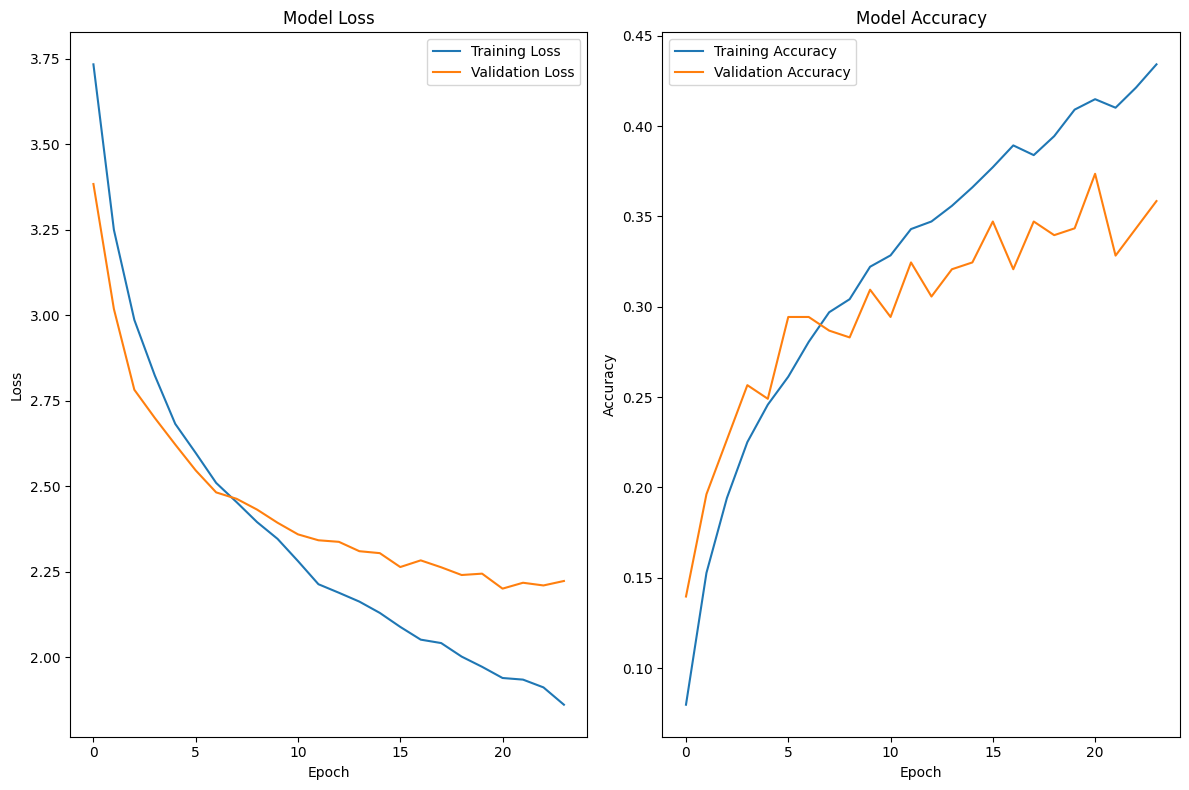

In [17]:
# Plotting Loss and Accuracy
plt.figure(figsize=(12, 8))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Model Evaluation

In [18]:
score = model.evaluate(test_ds, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 485ms/step - accuracy: 0.3583 - loss: 2.1283
Test loss: 2.294565439224243
Test accuracy: 0.3358490467071533


# Confusion Matrix

9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step 


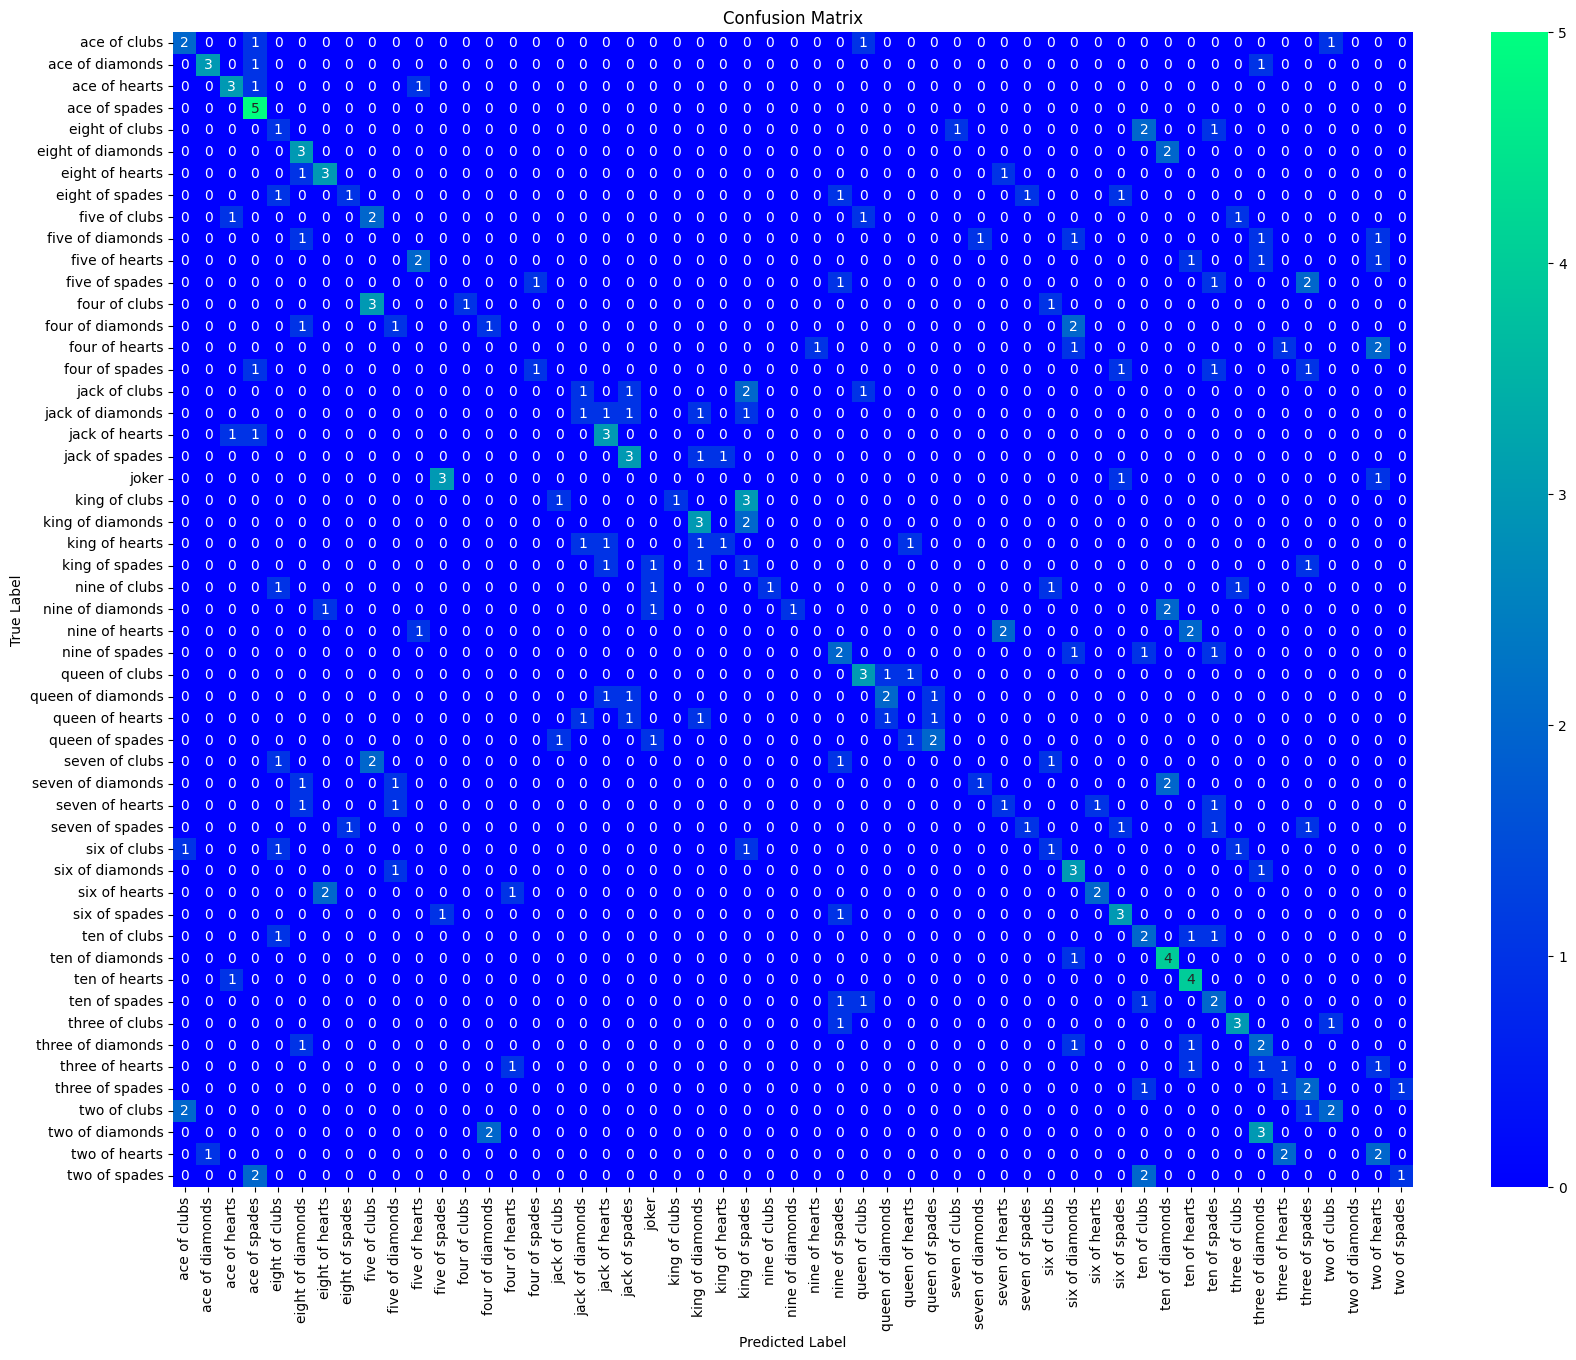

In [19]:
y_true = []
for _, y in test_ds.as_numpy_iterator():  
    y_true.extend(y)
y_true = np.array(y_true)
y_true = np.argmax(y_true, axis=1)

y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='winter', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Classification Report

In [20]:
print(classification_report(y_true, y_pred_classes, target_names=class_names))

                   precision    recall  f1-score   support

     ace of clubs       0.40      0.40      0.40         5
  ace of diamonds       0.75      0.60      0.67         5
    ace of hearts       0.50      0.60      0.55         5
    ace of spades       0.42      1.00      0.59         5
   eight of clubs       0.17      0.20      0.18         5
eight of diamonds       0.33      0.60      0.43         5
  eight of hearts       0.50      0.60      0.55         5
  eight of spades       0.50      0.20      0.29         5
    five of clubs       0.29      0.40      0.33         5
 five of diamonds       0.00      0.00      0.00         5
   five of hearts       0.50      0.40      0.44         5
   five of spades       0.00      0.00      0.00         5
    four of clubs       1.00      0.20      0.33         5
 four of diamonds       0.33      0.20      0.25         5
   four of hearts       0.00      0.00      0.00         5
   four of spades       0.50      0.20      0.29       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Fine Tuning**

We **unfreeze** the base model and train the entire model end-to-end with a **low** learning rate.

**Notes** although the base model becomes trainable, it is still running in inference mode since we passed `training=False` when calling it when we built the model. 

This means that the batch normalization layers inside won't update their batch statistics. If they did, they would wreck havoc on the representations learned by the model so far.

In [21]:
base_model.trainable=True
optimizer_finetune = tf.keras.optimizers.Adam(learning_rate=1e-5) 
model.compile(optimizer=optimizer_finetune, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ nasnet_large (Functional)            │ (None, 5, 5, 4032)          │      84,916,818 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 4032)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,129,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 53)                  │          27,189 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,598,599 (341.79 MB)

 Trainable params: 89,401,931 (341.04 MB)

 Non-trainable params: 196,668 (768.23 KB)

In [22]:
history2=model.fit(train_ds, epochs=epochs, validation_data=valid_ds,callbacks=[lr_scheduler,reduce_lr,early_stopping])

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 387s 825ms/step - accuracy: 0.3212 - loss: 2.3555 - val_accuracy: 0.2642 - val_loss: 3.8577 - learning_rate: 1.0000e-04
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 185s 775ms/step - accuracy: 0.5797 - loss: 1.4316 - val_accuracy: 0.2792 - val_loss: 4.0626 - learning_rate: 1.0000e-04
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 185s 773ms/step - accuracy: 0.6975 - loss: 1.0265 - val_accuracy: 0.3811 - val_loss: 3.1108 - learning_rate: 1.0000e-04
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


# Loss & Accuracy Graph

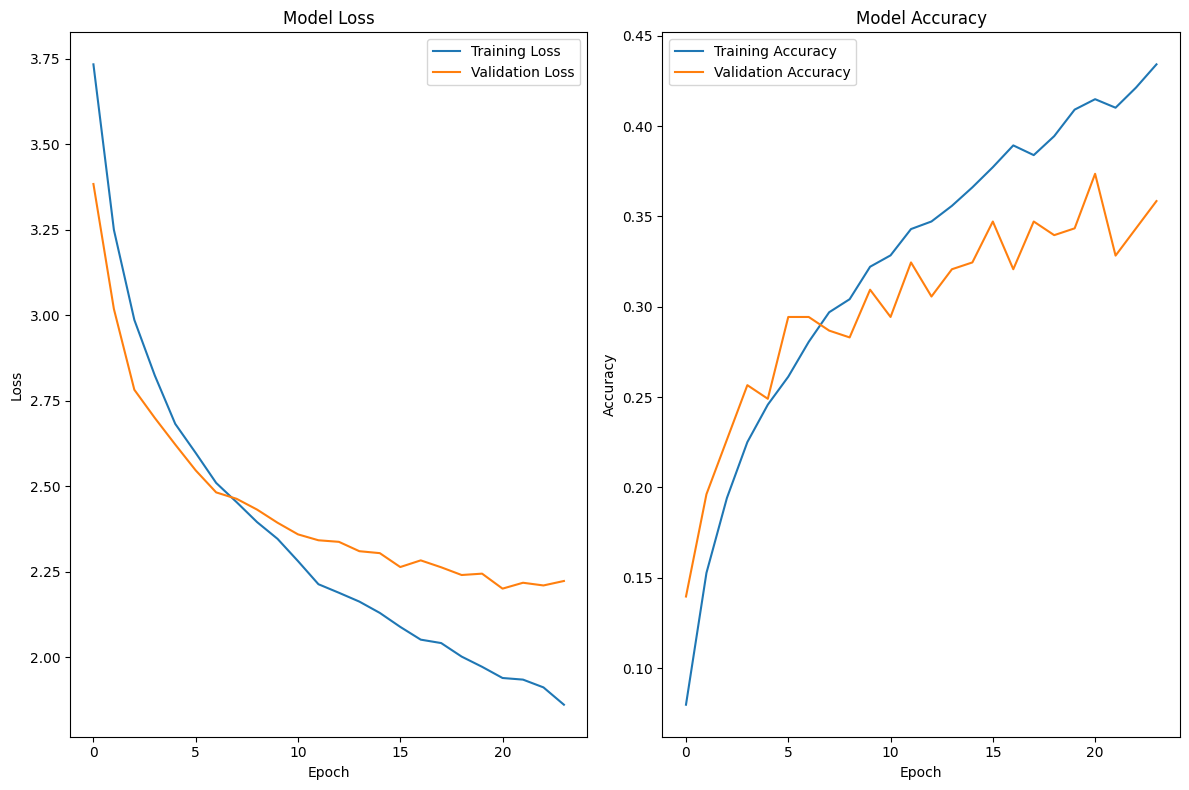

In [23]:
# Plotting Loss and Accuracy
plt.figure(figsize=(12, 8))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation

In [24]:
score = model.evaluate(valid_ds, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.3052 - loss: 3.4531
Test loss: 3.8577115535736084
Test accuracy: 0.2641509473323822


# Confusion Matrix

9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step 


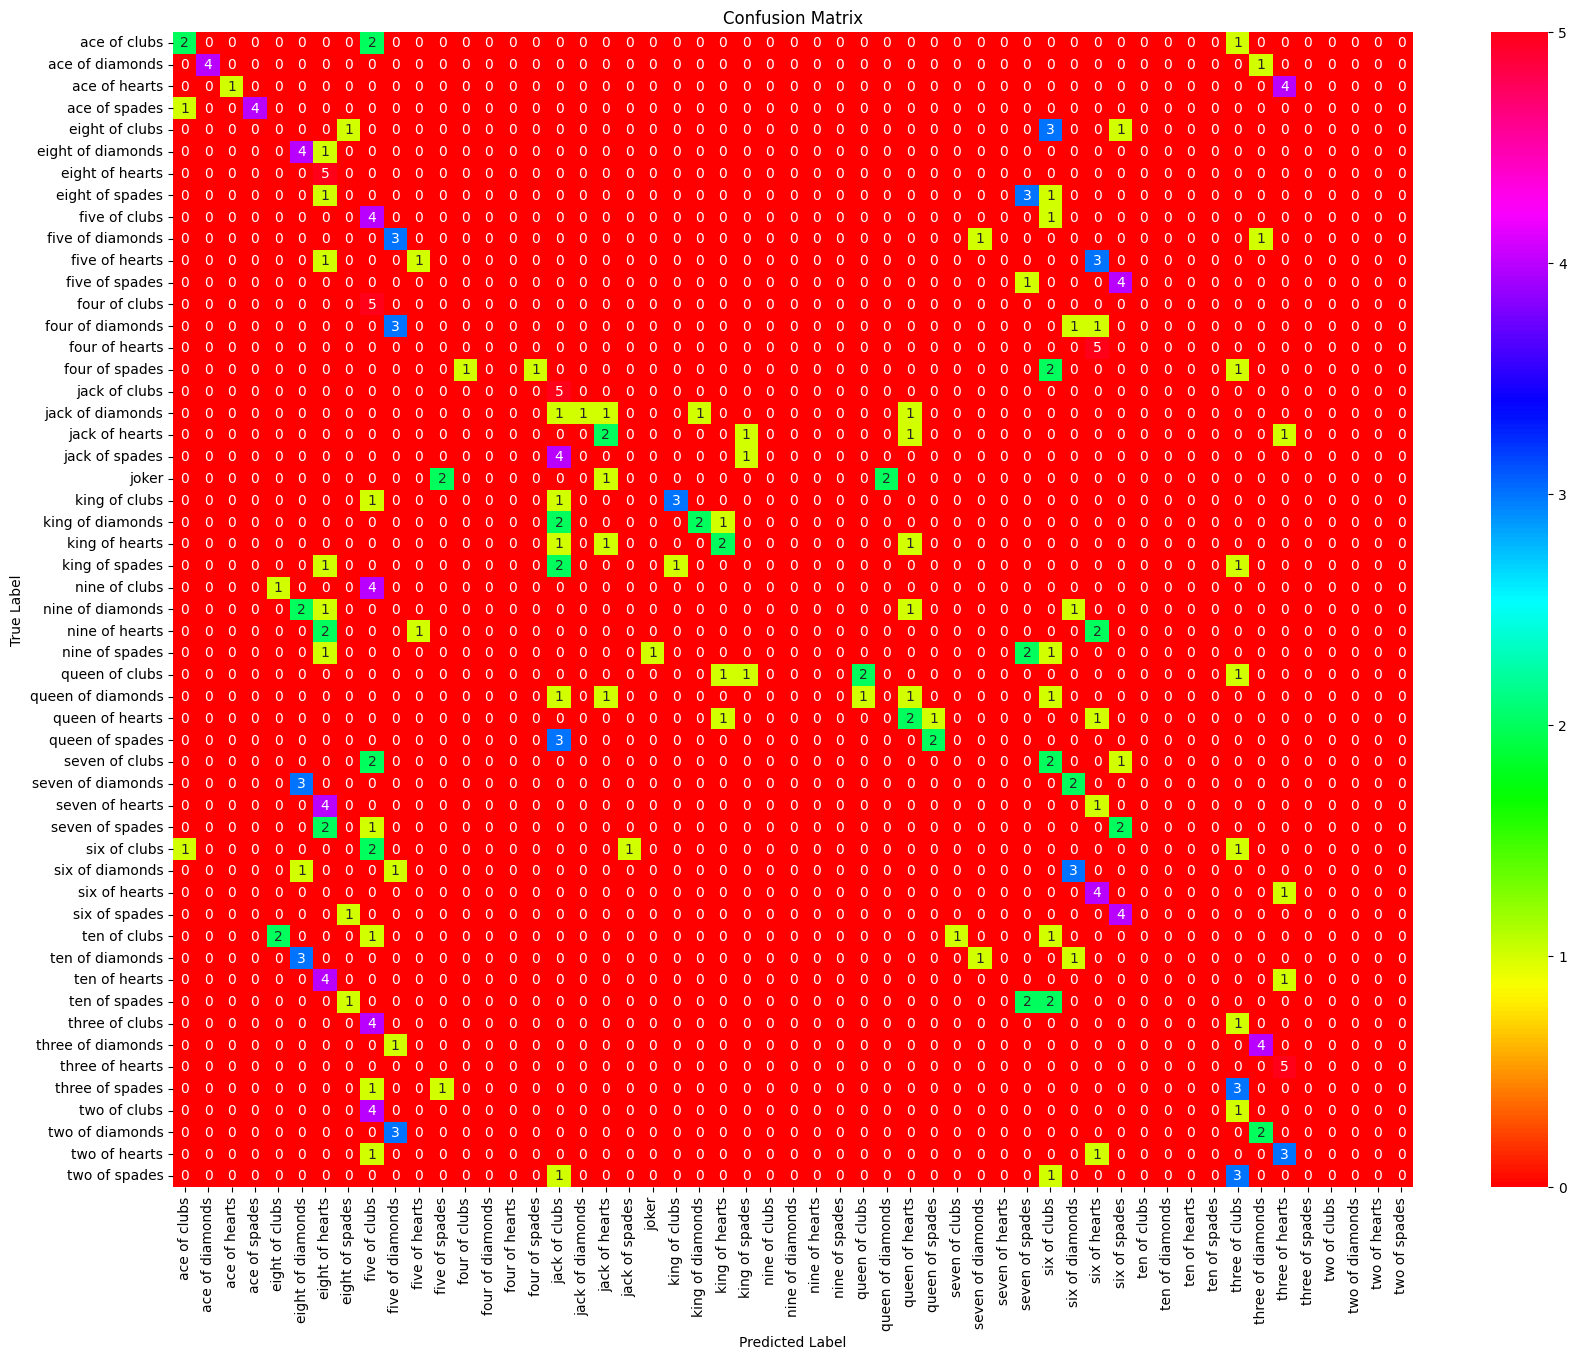

In [25]:
y_true = []
for _, y in test_ds.as_numpy_iterator():  
    y_true.extend(y)
y_true = np.array(y_true)
y_true = np.argmax(y_true, axis=1)

y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='hsv', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Classification Report

In [26]:
print(classification_report(y_true, y_pred_classes, target_names=class_names))

                   precision    recall  f1-score   support

     ace of clubs       0.50      0.40      0.44         5
  ace of diamonds       1.00      0.80      0.89         5
    ace of hearts       1.00      0.20      0.33         5
    ace of spades       1.00      0.80      0.89         5
   eight of clubs       0.00      0.00      0.00         5
eight of diamonds       0.31      0.80      0.44         5
  eight of hearts       0.22      1.00      0.36         5
  eight of spades       0.00      0.00      0.00         5
    five of clubs       0.12      0.80      0.22         5
 five of diamonds       0.27      0.60      0.37         5
   five of hearts       0.50      0.20      0.29         5
   five of spades       0.00      0.00      0.00         5
    four of clubs       0.00      0.00      0.00         5
 four of diamonds       0.00      0.00      0.00         5
   four of hearts       0.00      0.00      0.00         5
   four of spades       1.00      0.20      0.33       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
